In [1]:
#pacotes necessários

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('ggplot')

#### Dicionário de Variáveis utilizadas
|Chave|Descrição|Função|
|-----|-----|-----|
|**Identificação**|
|Ano| Ano de referência|Controle|
|Trimestre| Trimestre de referência|Controle|
|UF| Estado|Controle|
|Capital| Capital da UF|Controle|
|UPA| Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))|Controle|
|V1008| Número do Domicílio|Controle|
|V1014| Painel - Grupo de Controle|Controle|
|V1016| Número de entrevista (1 a 5)|Controle|
|V2003| Número de ordem|Controle|
|**Características**|
|V2007| Sexo|Característica|
|V2008| Dia Nascimento|Característica|
|V20081| Mês nascimento|Característica|
|V20082| Ano nascimento|Característica|
|V2010| Raça|Característica|
|**Variáveis exploradas**|
| VD4001 | Condição em relação à força de trabalho na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4002 | Condição de ocupação na semana de referência para pessoas de 14 anos ou mais de idade | Descrição |
| VD4003 | Força de trabalho potencial para pessoas de 14 anos ou mais de idade | Descrição |
| VD4004A | Subocupação por insuficiência de horas efetivamente trabalhadas em todos os trabalhos | Descrição |
| VD4005 | Pessoas desalentadas na semana de referência | Descrição |
|**Auxiliares**|
|V1028| Peso do domicílio e das pessoas sem calibração|Expansão|
|V1029| Peso do domicílio e das pessoas com calibração|Expansão|
|V1033| Projeção da população por sexo e idade|Expansão|
|posest|Domínios de projeção geográficos|Expansão|

 Chave para pessoa: UPA + V1008 + V1014  + V2003 + V2007 + V2008 + V20081 + V20082

 **PARA ESTIMAÇÃO DA POPULAÇÃO, DEVE-SE USAR AS VARIÁVEIS: V1033 e posest.**



Importação das bases

In [2]:
#determina qual diretório usar para cada sistema operacional.
import os
if os.name == 'nt': #windows
    diretorio = 'C:\\Users\\est.matheus.brasil\\Documents\\Microdados PNAD Contínua\\feather\\'

else: #linux(ou mac)
    diretorio = '/home/matheus/Microdados PNAD/feather/'

#Leitura de todas as bases com as variáveis selecionadas e criação de variáveis dinamicamente.

colunas_selecionadas = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008', 'V1014', 'V2007', 'V2008', 'V20081', 'V20082', 'V2010', #Controle e chave ID
                        'V1016', 'VD4001','VD4002', 'VD4003','VD4004A','VD4005', #Variáveis de interesse
                        'V1027', 'V1028', 'V1029', 'V1033', 'posest', 'posest_sxi'] #expansão
                    
for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
                print(f'lendo PNAD{ano} {tri}')
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if 2019 < ano < 2022:
                print(f'lendo PNAD{ano} {tri}')
                globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)
        if ano == 2022 and tri < 3:
            print(f'lendo PNAD{ano} {tri}')
            globals()[f'pnad_{ano}_{tri}'] = pd.read_feather(fr'{diretorio}{ano}_{tri}.feather', columns=colunas_selecionadas)

lendo PNAD2019 4
lendo PNAD2020 1
lendo PNAD2020 2
lendo PNAD2020 3
lendo PNAD2020 4
lendo PNAD2021 1
lendo PNAD2021 2
lendo PNAD2021 3
lendo PNAD2021 4
lendo PNAD2022 1
lendo PNAD2022 2


Tratamento dos dados

In [57]:
pnadc_completa = pd.concat([pnad_2019_4, 
                            pnad_2020_1, 
                            pnad_2020_2, 
                            pnad_2020_3, 
                            pnad_2020_4, 
                            pnad_2021_1, 
                            pnad_2021_2, 
                            pnad_2021_3, 
                            pnad_2021_4, 
                            pnad_2022_1, 
                            pnad_2022_2])

In [58]:
pnadc_completa = pnadc_completa[(pnadc_completa['V2008'] != 99)&(pnadc_completa['V20081'] != 99)&(pnadc_completa['V20082'] != 9999)]

In [60]:
#Concatena todos os dataframes de cada ano e trimestre em uma unica tabela.

# pnadc_completa = pd.concat([pnad_2019_4, 
#                             pnad_2020_1, 
#                             pnad_2020_2, 
#                             pnad_2020_3, 
#                             pnad_2020_4, 
#                             pnad_2021_1, 
#                             pnad_2021_2, 
#                             pnad_2021_3, 
#                             pnad_2021_4, 
#                             pnad_2022_1, 
#                             pnad_2022_2])
#Converte variável para criar ID
pnadc_completa['V2007'] = np.where(pnadc_completa['V2007'] == 'Homem', 0, 1)
#Converte variáveis para numéricas
pnadc_completa['UPA'] = pd.to_numeric(pnadc_completa['UPA'] , errors='coerce')
pnadc_completa['V1008'] = pd.to_numeric(pnadc_completa['V1008'] , errors='coerce')
pnadc_completa['V1014'] = pd.to_numeric(pnadc_completa['V1014'] , errors='coerce')
pnadc_completa['V2007'] = pd.to_numeric(pnadc_completa['V2007'] , errors='coerce')
pnadc_completa['V2008'] = pd.to_numeric(pnadc_completa['V2008'] , errors='coerce')
pnadc_completa['V20081'] = pd.to_numeric(pnadc_completa['V20081'] , errors='coerce')
pnadc_completa['V20082'] = pd.to_numeric(pnadc_completa['V20082'] , errors='coerce')

#Cria chave ID e novo df
pnadc_completa = pd.DataFrame({
    #Controle
    'Ano':pnadc_completa['Ano'], 
    'Trimestre':pnadc_completa['Trimestre'],
    'UPA':pnadc_completa['UPA'],
    'UF':pnadc_completa['UF'],
    'V2007':pnadc_completa['V2007'],
    #ID  
    'ID': pnadc_completa['UPA'].map(str) + 
        pnadc_completa['V1008'].map(str) + 
        pnadc_completa['V1014'].map(str) + 
        pnadc_completa['V2007'].map(str) +
        pnadc_completa['V2008'].map(str) +
        pnadc_completa['V20081'].map(str) +
        pnadc_completa['V20082'].map(str),
    #Exploradas
    'V2010': pnadc_completa['V2010'],
    'VD4001': pnadc_completa['VD4001'],
    'VD4002': pnadc_completa['VD4002'],
    'VD4003': pnadc_completa['VD4003'],
    'VD4004A': pnadc_completa['VD4004A'],
    'VD4005': pnadc_completa['VD4005'],
    'V1016': pnadc_completa['V1016'],
    #Expansão
    'V1027': pnadc_completa['V1027'],
    'V1028': pnadc_completa['V1028'],
    'V1029': pnadc_completa['V1029'],
    'V1033': pnadc_completa['V1033'],
    'posest': pnadc_completa['posest'],
    'posest_sxi': pnadc_completa['posest_sxi']
    })

pnadc_completa['ID'] = pnadc_completa['ID'].map(int)

#Reverte alteração da coluna V2007 para os rótulos anteiores
pnadc_completa['V2007'] = pnadc_completa['V2007'].apply(lambda x: 'Homem' if x == 0 else 'Mulher')
# Ordernação da série histórica por ano e trimestre.
pnadc_completa.sort_values(by=['Ano', 'Trimestre'], inplace=True)
#concatena a coluna 'Ano' e 'Trimestre' em uma única coluna.
pnadc_completa['ano_tri'] = pnadc_completa['Ano'].astype(str) + 'Q' + pnadc_completa['Trimestre'].astype(str)
#Conversão da coluna ano_tri para datetime.
pnadc_completa['ano_tri'] = pd.to_datetime(pnadc_completa['ano_tri']).dt.to_period('Q')

### Características das pessoas que muda de ocupado para desocupado

#### 2019 para 2020

In [5]:
pnadc_20194 = pnadc_completa[pnadc_completa['ano_tri'] == '2019Q4']
situacao_cor_2019 = pd.crosstab(pnadc_20194['ano_tri'], [pnadc_20194['VD4002'], pnadc_20194['V2010']], values=pnadc_20194['V1028'], aggfunc='sum').T

In [6]:
pnadc_20201 = pnadc_completa[pnadc_completa['ano_tri'] == '2020Q2']
situacao_cor_2020 = pd.crosstab(pnadc_20201['ano_tri'], [pnadc_20201['VD4002'], pnadc_20201['V2010']], values=pnadc_20201['V1028'], aggfunc='sum').T

In [7]:
situacao_cor_2019_2020 = pd.merge(situacao_cor_2019, situacao_cor_2020, on=['VD4002', 'V2010'], how='outer')

<AxesSubplot:title={'center':'Situação corrente por cor/raça e sexo'}, ylabel='Situação corrente'>

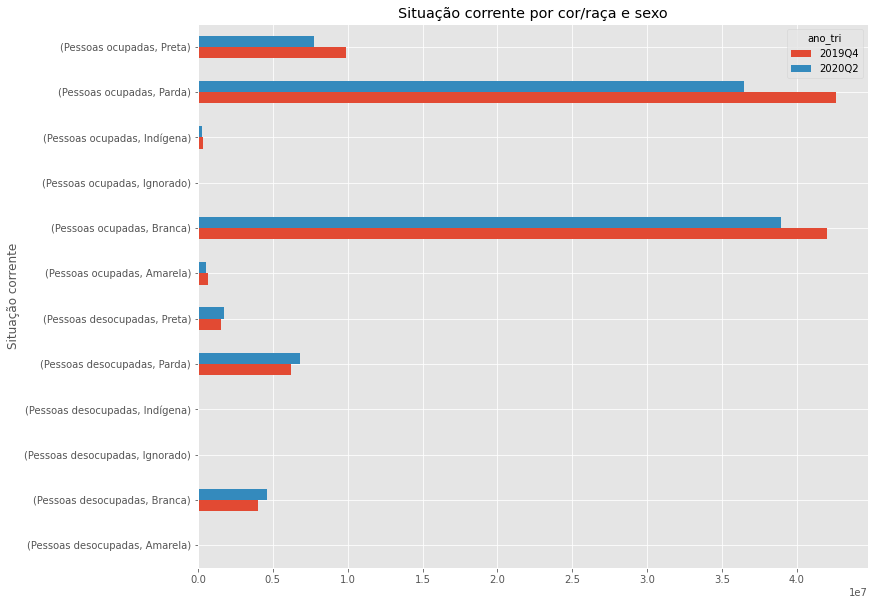

### Mudança Individual

In [66]:
pnadc_20194 = pnadc_completa[(pnadc_completa['ano_tri'] == '2019Q4') & (pnadc_completa['V1016'] < 5) & (pnadc_completa['VD4001'] == 'Pessoas na força de trabalho')]
pnadc_20201 = pnadc_completa[(pnadc_completa['ano_tri'] == '2020Q1') & (pnadc_completa['V1016'] > 1) & (pnadc_completa['VD4001'] == 'Pessoas na força de trabalho')]

In [67]:
pnad_individuos = pd.concat([pnadc_20194, pnadc_20201])

In [89]:
pnad_individuos['ID'].value_counts().to_dict()

{110000016171221974: 2,
 350133542880361953: 2,
 35071072927128121981: 2,
 35071072910701531994: 2,
 350710729117130101988: 2,
 350133542180641969: 2,
 3501335421812381977: 2,
 350133542680771952: 2,
 3501335427812641974: 2,
 3501335427802731974: 2,
 35013354211811361987: 2,
 3501585655701561997: 2,
 3501335421180721980: 2,
 35013354214802311959: 2,
 35013354214811351994: 2,
 35013354214812851978: 2,
 35015856517126121989: 2,
 3501585652702981965: 2,
 3501585653711571960: 2,
 3501585654715121980: 2,
 35065277114812941972: 2,
 3506527711180591965: 2,
 35065277111811461980: 2,
 35065277110801461942: 2,
 35064357014711101972: 2,
 35064543118030101990: 2,
 3506454311812231996: 2,
 35064543128120121951: 2,
 3506454313812861961: 2,
 3506454316801551949: 2,
 3506454317801851989: 2,
 3506454318801581986: 2,
 350645431881781987: 2,
 3506454319802991986: 2,
 35064543112801691986: 2,
 3506454311480121992: 2,
 3506527711802221989: 2,
 350652771281861970: 2,
 3506527714801851962: 2,
 35065277188020

In [93]:
#drop diplicates for each ID and V1016 columns values on pnad_individuos

pnad_individuos.drop_duplicates(subset=['ID', 'V1016'], keep='first', inplace=True)
